## Upload Data

In [1]:
# run this cell
import syft as sy
from utils import *
from syft.core.adp.data_subject_list import NewDataSubject
print("Syft is imported")

/home/e/anaconda3/envs/Hagrid/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Syft is imported


In [2]:
domain_client = sy.login(email="info@openmined.org", password="changethis", port=8081)


Anyone can login as an admin to your node right now because your password is still the default PySyft username and password!!!

Connecting to localhost... done! 	 Logging into adp... done!


BreastCancerDataset-02ec48b840824b1ea3e1f5d11c45314b.pkl is already downloaded
Columns: Index(['patient_ids', 'labels', 'images'], dtype='object')
Total Images: 2775
Label Mapping {'Non-Invasive Ductal Carcinoma (IDC)': 0, 'Invasive Ductal Carcinoma (IDC)': 1}


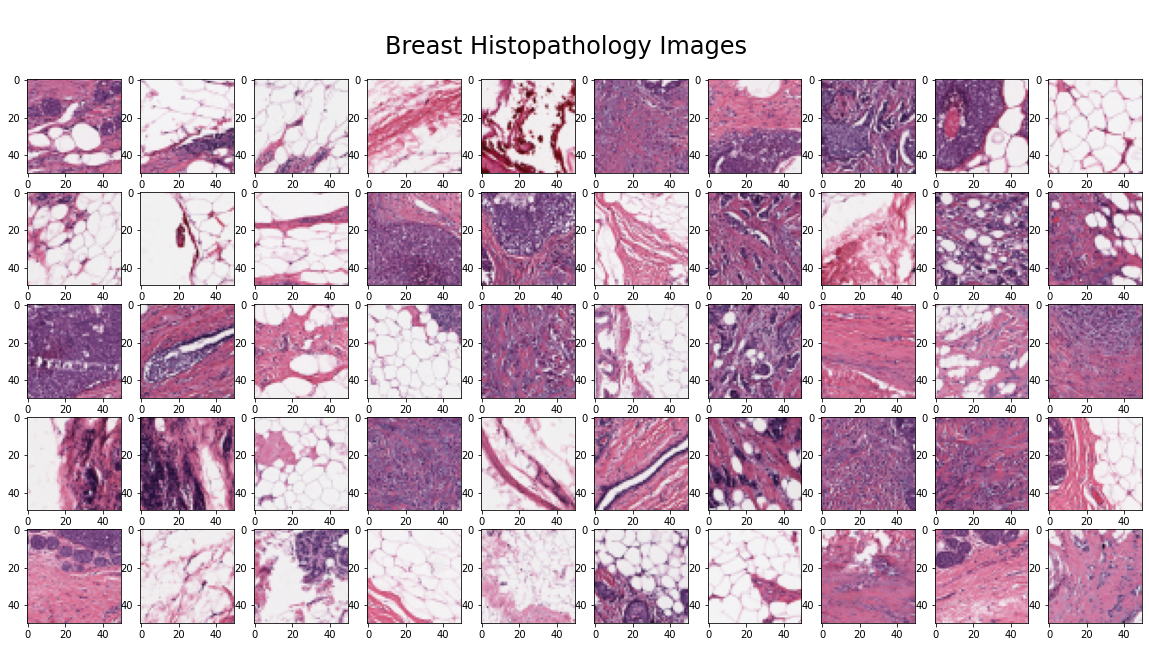

In [3]:
# edit MY_DATASET_URL then run this cell

MY_DATASET_URL = "https://raw.githubusercontent.com/OpenMined/datasets/main/BreastCancerDataset/subsets/BreastCancerDataset-02ec48b840824b1ea3e1f5d11c45314b.pkl"

dataset = download_dataset(MY_DATASET_URL)
# see footnotes for information about the dataset

In [4]:
dataset.head()

,patient_ids,labels,images
0,22545,0,"[[[223, 204, 216], [238, 234, 238], [234, 228,..."
1,22545,0,"[[[205, 100, 129], [197, 86, 122], [188, 80, 1..."
2,22545,0,"[[[227, 205, 215], [204, 143, 176], [218, 169,..."
3,22545,0,"[[[239, 227, 230], [234, 197, 214], [240, 229,..."
4,22545,0,"[[[234, 221, 227], [234, 218, 227], [240, 238,..."


In [5]:
# run this cell
train, val, test = split_and_preprocess_dataset(data=dataset)

Splitting dataset into train, validation and test sets.
Preprocessing the dataset...
Dims (2237, 3, 50, 50)
Dims (267, 3, 50, 50)
Dims (271, 3, 50, 50)
Preprocessing completed.


In [6]:
# run this cell
data_subjects_image = np.ones(train["images"].shape).astype(object)
for i,patient in enumerate(train["patient_ids"]):
    data_subjects_image[i] = NewDataSubject([str(patient)])

data_subjects_labels = np.ones(train["labels"].shape).astype(object)
for i,patient in enumerate(train["patient_ids"]):
    data_subjects_labels[i] = NewDataSubject([str(patient)])

    
train_image_data = sy.Tensor(train["images"]).annotated_with_dp_metadata(
    min_val=0, max_val=255, data_subjects=data_subjects_image
)
train_label_data = sy.Tensor(train["labels"]).annotated_with_dp_metadata(
    min_val=0, max_val=1, data_subjects=data_subjects_labels
)

Tensor annotated with DP Metadata
Tensor annotated with DP Metadata


In [7]:
# data_subjects = DataSubjectList.from_series(val["patient_ids"])
# val_image_data = sy.Tensor(val["images"]).annotated_with_dp_metadata(
#     min_val=0, max_val=255, data_subjects=data_subjects
# )
# val_label_data = sy.Tensor(val["labels"]).annotated_with_dp_metadata(
#     min_val=0, max_val=1, data_subjects=data_subjects
# )

In [8]:
# data_subjects = DataSubjectList.from_series(test["patient_ids"])
# test_image_data = sy.Tensor(test["images"]).annotated_with_dp_metadata(
#     min_val=0, max_val=255, data_subjects=data_subjects
# )
# test_label_data = sy.Tensor(test["labels"]).annotated_with_dp_metadata(
#     min_val=0, max_val=1, data_subjects=data_subjects
# )

In [9]:
from syft.util import size_mb

In [10]:
# run this cell
domain_client.load_dataset(
    name="BreastCancerDataset",
    assets={
        "train_images": train_image_data[:2],
        "train_labels": train_label_data[:2],
    
#         "val_images": val_image_data,
#         "val_labels": val_label_data,
#         "test_images": test_image_data,
#         "test_labels": test_label_data,
    },
    description="Invasive Ductal Carcinoma (IDC) is the most common subtype of all breast cancers. \
    The modified dataset consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x. \
    Patches of size 50 x 50 were extracted from the original image. The labels 0 is non-IDC and 1 is IDC."
)

kj/filesystem-disk-unix.c++:1690: warning: PWD environment variable doesn't match current directory; pwd = /home/e/PycharmProjects/PySyft/notebooks/Experimental/Ishan


Loading dataset... uploading...🚀                                                                                                                                             

Uploading `train_labels`: 100%|██████████████████████████████████████| 1/1 [00:00<00:00, 226.41it/s]


Dataset is uploaded successfully !!! 🎉

Run `<your client variable>.datasets` to see your new dataset loaded into your machine!


In [11]:
# run this cell
domain_client.datasets

Idx,Name,Description,Assets,Id
[0],BreastCancerDataset,Invasive Ductal Carcinoma (IDC) is the most common subtype of all breast cancers. The modified dataset consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x. Patches of size 50 x 50 were extracted from the original image. The labels 0 is non-IDC and 1 is IDC.,"[""train_images""] -> [""train_labels""] ->",b6408d00-4b6c-4767-897c-27e289707f12
